# Cyril's Dataset 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Annee,PermNonPermPop_CD,PermNonPermPop,GroupeEtrangers_CD,GroupeEtrangers,Autorisation_CD,Autorisation,GroupeAge_CD,GroupeAge,DureeSejour_CD,...,Sexe,CantonHabitation_CD,CantonHabitation,Nation_CD,Nation,Continent_CD,Continent,EuropeEtatsTiers_CD,EuropeEtatsTiers,NombrePersonnes
0,2023,1,Population permanente étrangère,1,Permis de courte durée (L) >= 12 mois,1,Autorisation UE/AELE,1,00 - 05 ans,1,...,Hommes,1,Zurich,236,Espagne,1,Europe,1,UE,1
1,2023,1,Population permanente étrangère,1,Permis de courte durée (L) >= 12 mois,1,Autorisation UE/AELE,1,00 - 05 ans,1,...,Hommes,2,Berne,204,Belgique,1,Europe,1,UE,1
2,2023,1,Population permanente étrangère,1,Permis de courte durée (L) >= 12 mois,1,Autorisation UE/AELE,1,00 - 05 ans,1,...,Hommes,2,Berne,206,Danemark,1,Europe,1,UE,1
3,2023,1,Population permanente étrangère,1,Permis de courte durée (L) >= 12 mois,1,Autorisation UE/AELE,1,00 - 05 ans,1,...,Hommes,2,Berne,218,Italie,1,Europe,1,UE,3
4,2023,1,Population permanente étrangère,1,Permis de courte durée (L) >= 12 mois,1,Autorisation UE/AELE,1,00 - 05 ans,1,...,Hommes,2,Berne,232,Roumanie,1,Europe,1,UE,1


In [5]:
yearly_immigration = df.groupby('Annee')['NombrePersonnes'].count()
yearly_immigration

Annee
2020    88574
2021    91397
2022    93908
2023    96672
Name: NombrePersonnes, dtype: int64

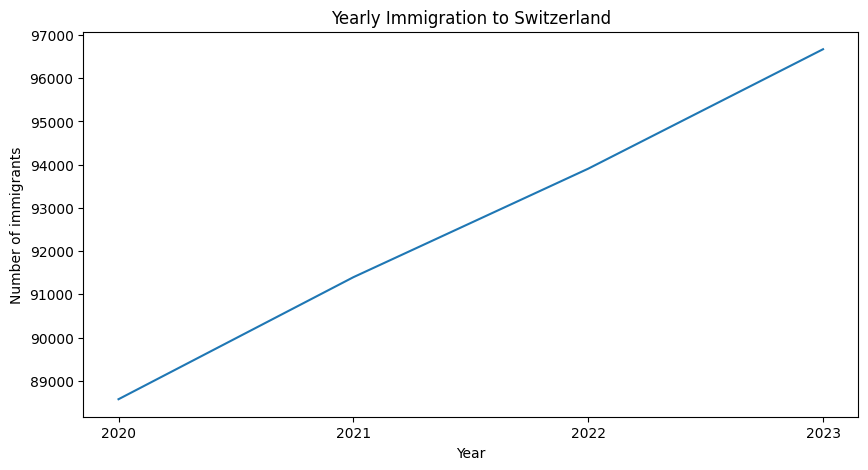

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_immigration.index, yearly_immigration.values)
plt.title('Yearly Immigration to Switzerland')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.xticks(np.arange(2020, 2024, 1))
plt.show()

In [7]:
yearly_imm_by_country = df.groupby(['Annee', 'Nation'])['NombrePersonnes'].count().unstack()
yearly_imm_by_country

Nation,Afghanistan,Afrique du sud,Albanie,Algérie,Allemagne,Andorre,Angola,Antigua-et-Barbuda,Apatride,Arabie saoudite,...,Yémen,Zambie,Zimbabwe,Égypte,Émirats arabes unis,Équateur,Érythrée,État inconnu,États-unis d'Amérique,Éthiopie
Annee,,,,,,,,,,,,,,,,,,,,,
2020,817.0,605.0,602.0,670.0,2007.0,20.0,469.0,12.0,284.0,149.0,...,198.0,55.0,141.0,556.0,16.0,509.0,1120.0,379.0,1642.0,635.0
2021,871.0,593.0,631.0,672.0,2046.0,24.0,464.0,10.0,294.0,153.0,...,204.0,60.0,141.0,568.0,18.0,532.0,1160.0,393.0,1628.0,679.0
2022,973.0,613.0,650.0,700.0,2023.0,34.0,464.0,20.0,326.0,159.0,...,218.0,63.0,139.0,598.0,20.0,539.0,1216.0,391.0,1689.0,698.0
2023,1039.0,644.0,705.0,724.0,2060.0,41.0,473.0,23.0,384.0,164.0,...,231.0,61.0,146.0,595.0,27.0,546.0,1259.0,414.0,1733.0,733.0


In [8]:
fig = px.line(yearly_imm_by_country, title='Yearly immigration to Switzerland by country')
# Modify x-ticks
fig.update_xaxes(tickvals=np.arange(2020, 2024, 1))
fig.show()

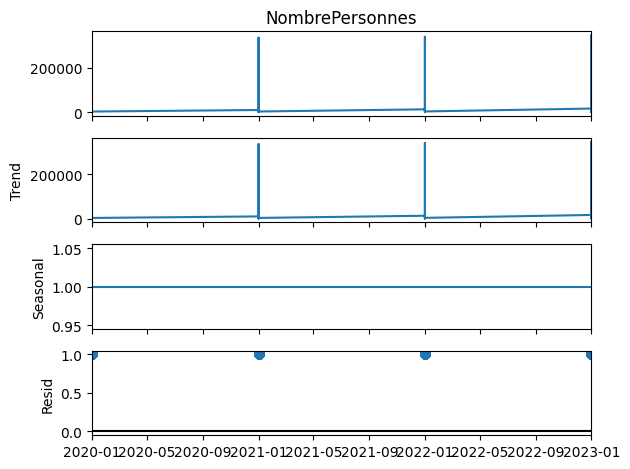

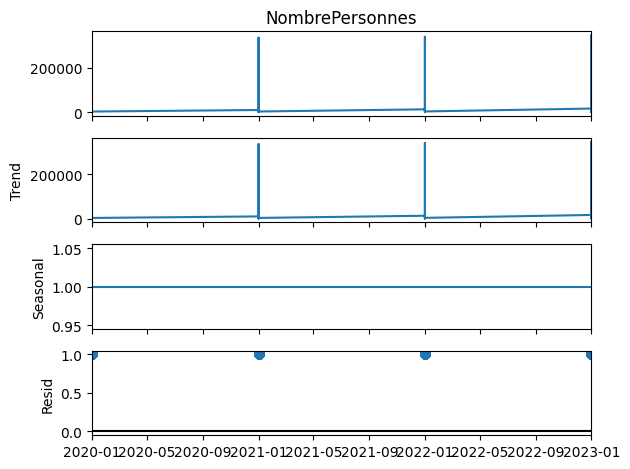

In [9]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Prepare data
df = df.groupby(['Annee', 'Nation'])['NombrePersonnes'].sum().reset_index()
df['Date'] = pd.to_datetime(df['Annee'].astype(str))
df.index = df['Date']

# Decompose
result = seasonal_decompose(df['NombrePersonnes'], model='multiplicative', period=1)
result.plot()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Charger les données
df = pd.read_csv('data.csv', sep=';')

# Vérifier les données
if df.isnull().sum().any():
    raise ValueError("Les données contiennent des valeurs manquantes. Veuillez les traiter avant de continuer.")
if 'Annee' not in df.columns or 'NombrePersonnes' not in df.columns:
    raise ValueError("Les colonnes 'Annee' et 'NombrePersonnes' doivent être présentes dans le fichier CSV.")

# Agréger les données par année
yearly_immigration = df.groupby('Annee')['NombrePersonnes'].sum().reset_index()
yearly_immigration = yearly_immigration.sort_values('Annee')

# Vérifier le nombre de données disponibles
if len(yearly_immigration) <= 3:
    raise ValueError("Le nombre d'années dans les données est insuffisant pour créer des séquences (minimum 4).")

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
yearly_immigration['Normalized'] = scaler.fit_transform(yearly_immigration[['NombrePersonnes']])

# Créer les séquences pour LSTM
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

seq_length = min(3, len(yearly_immigration) - 1)  # Adapter la longueur de la séquence
data = yearly_immigration['Normalized'].values
X, y = create_sequences(data, seq_length)

# Reshaper pour LSTM (échantillons, pas de temps, caractéristiques)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Diviser en jeu d'entraînement et de test
train_size = int(len(X) * 0.8)
if train_size == 0:
    raise ValueError("Le jeu d'entraînement est vide. Vérifiez vos données ou ajustez les paramètres.")
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construire le modèle LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Faire des prédictions
y_pred = model.predict(X_test)

# Dénormaliser les prédictions et les vraies valeurs
y_test_denormalized = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_denormalized = scaler.inverse_transform(y_pred)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test_denormalized, label='Valeurs réelles', marker='o', linestyle='--')
plt.plot(range(len(y_pred)), y_pred_denormalized, label='Prédictions', marker='x', linestyle='-')
plt.title('Prédictions LSTM vs Valeurs Réelles')
plt.xlabel('Étapes temporelles')
plt.ylabel('Nombre de migrants')
plt.legend()
plt.grid(True)
plt.show()

# Sauvegarder le modèle et les prédictions
model.save('lstm_migration_model.h5')
np.savetxt('predictions.csv', np.hstack([y_test_denormalized, y_pred_denormalized]), delimiter=',', header='Real,Predicted', comments='')

ValueError: Le jeu d'entraînement est vide. Vérifiez vos données ou ajustez les paramètres.

In [13]:
import pandas as pd

# Charger le dataset à partir d'un fichier CSV
# Remplacez 'votre_fichier.csv' par le chemin vers votre fichier CSV
df = pd.read_csv('DATASET_AnSeqDa.csv')

# Restructuration du dataset pour passer au format long
df_long = pd.melt(df, id_vars=["pays"], var_name="date", value_name="nombre_total")

# Conversion de la colonne 'date' en type datetime pour les calculs
df_long['date'] = pd.to_datetime(df_long['date'])

# Calcul de la différence mensuelle (entrée_mensuelle)
df_long['entree_mensuelle'] = df_long.groupby('pays')['nombre_total'].diff()

# Sauvegarder le nouveau dataset
df_long.to_csv('dataset_reformate.csv', index=False)

print(df_long.head())

        pays       date  nombre_total  entree_mensuelle
0    Albanie 2014-01-01          1317               NaN
1  Allemagne 2014-01-01        306271               NaN
2    Andorre 2014-01-01            23               NaN
3   Autriche 2014-01-01         41262               NaN
4    Bélarus 2014-01-01          1104               NaN
